In [19]:
%matplotlib inline

In [20]:
import numpy as np
import matplotlib.pyplot as plt
# Make numpy print 4 significant digits for prettiness
np.set_printoptions(precision=4, suppress=True)
np.random.seed(5) # To get predictable random numbers

<BarContainer object of 40 artists>

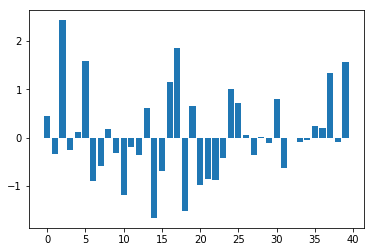

In [21]:
n_points = 40
x_vals = np.arange(n_points)
y_vals = np.random.normal(size=n_points)
plt.bar(x_vals, y_vals)

In [22]:
x_vals

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
       17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
       34, 35, 36, 37, 38, 39])

In [23]:
y_vals

array([ 0.4412, -0.3309,  2.4308, -0.2521,  0.1096,  1.5825, -0.9092,
       -0.5916,  0.1876, -0.3299, -1.1928, -0.2049, -0.3588,  0.6035,
       -1.6648, -0.7002,  1.1514,  1.8573, -1.5112,  0.6448, -0.9806,
       -0.8569, -0.8719, -0.4225,  0.9964,  0.7124,  0.0591, -0.3633,
        0.0033, -0.1059,  0.7931, -0.6316, -0.0062, -0.1011, -0.0523,
        0.2492,  0.1977,  1.3348, -0.0869,  1.5615])

# The Gaussian kernel
# 这是一个均值为0，标准差为1的高斯分布

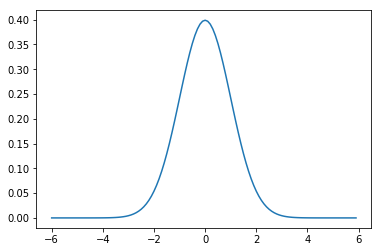

In [24]:
x = np.arange(-6, 6, 0.1) # x from -6 to 6 in steps of 0.1
y = 1 / np.sqrt(2 * np.pi) * np.exp(-x ** 2 / 2.)
plt.plot(x, y)

In [25]:
#### 通常我们通过标准差σ来定义高斯分布的形状
#### 当高斯分布用来做平滑是，我们通常使用Full Width at Half Maximum (FWHM)来描述高斯分布的宽度

# The FWHM is the width of the kernel, at half of the maximum of the height of the Gaussian.
# Thus, for the standard Gaussian above, the maximum height is ~0.4.
# The width of the kernel at 0.2 (on the Y axis) is the FWHM.
# As x = -1.175 and 1.175 when y = 0.2, the FWHM is roughly 2.35.

# The FWHM is related to sigma by the following formulae (in Python):

def sigma2fwhm(sigma):
    return sigma * np.sqrt(8 * np.log(2))

def fwhm2sigma(fwhm):
    return fwhm / np.sqrt(8 * np.log(2))

sigma2fwhm(1)

2.3548200450309493

# Smoothing with the kernel

In [26]:
FWHM = 4
sigma = fwhm2sigma(FWHM)

In [27]:
x_vals

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
       17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
       34, 35, 36, 37, 38, 39])

In [28]:
x_position = 13 # 14th point
kernel_at_pos = np.exp(-(x_vals - x_position) ** 2 / (2 * sigma ** 2))
kernel_at_pos

array([0.    , 0.    , 0.    , 0.    , 0.    , 0.    , 0.0002, 0.002 ,
       0.0131, 0.0625, 0.2102, 0.5   , 0.8409, 1.    , 0.8409, 0.5   ,
       0.2102, 0.0625, 0.0131, 0.002 , 0.0002, 0.    , 0.    , 0.    ,
       0.    , 0.    , 0.    , 0.    , 0.    , 0.    , 0.    , 0.    ,
       0.    , 0.    , 0.    , 0.    , 0.    , 0.    , 0.    , 0.    ])

In [29]:
y_vals[13]

0.6034716026094954

<BarContainer object of 40 artists>

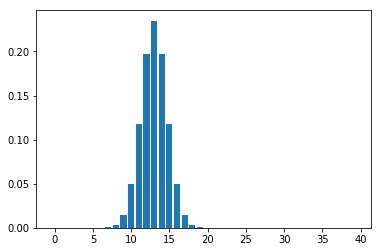

In [30]:
kernel_at_pos = kernel_at_pos / sum(kernel_at_pos)
plt.bar(x_vals, kernel_at_pos)

In [31]:
# In fact the Gaussian values for the 12th through 16th data points are
kernel_at_pos[11:16]

array([0.1174, 0.1975, 0.2349, 0.1975, 0.1174])

In [32]:
# the data values for the same points are
y_vals[11:16]

array([-0.2049, -0.3588,  0.6035, -1.6648, -0.7002])

#### 平滑后的值

In [33]:
# We then multiply the Gaussian kernel (weight) values by the values of our data
# and sum the results to get the new smoothed value for point 13

y_by_weight = y_vals * kernel_at_pos # element-wise multiplication
new_val = sum(y_by_weight)
new_val

-0.3479685901184573

<BarContainer object of 40 artists>

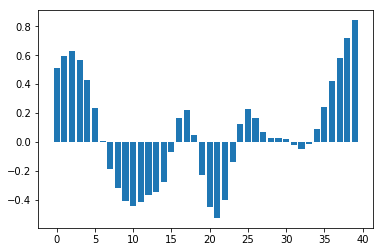

In [34]:
# We store this new smoothed value for future use, and move on

smoothed_vals = np.zeros(y_vals.shape)
for x_position in x_vals:
    kernel = np.exp(-(x_vals - x_position) ** 2 / (2 * sigma ** 2))
    kernel = kernel / sum(kernel)
    smoothed_vals[x_position] = sum(y_vals * kernel)
plt.bar(x_vals, smoothed_vals)